# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

Load feature names.

In [2]:
feature_names = []
with open('Data/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print('Loaded feature names:', len(feature_names))

Loaded feature names: 126


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [3]:
X, Y = [], []

with open('Data/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

Percentage of variance explained by each of the first 50 principal components individually: [('PC #1:', 0.16404331279334267), ('PC #2:', 0.13323478869447283), ('PC #3:', 0.10173456522146507), ('PC #4:', 0.070633564349859734), ('PC #5:', 0.038666463507026315), ('PC #6:', 0.036808043074891397), ('PC #7:', 0.03128239102667648), ('PC #8:', 0.027337373527479582), ('PC #9:', 0.026164904689085347), ('PC #10:', 0.022309425678451997), ('PC #11:', 0.020481729536682498), ('PC #12:', 0.018683306590931596), ('PC #13:', 0.017344220329207429), ('PC #14:', 0.016843606456969345), ('PC #15:', 0.01518818794717931), ('PC #16:', 0.015086184281048652), ('PC #17:', 0.014291335036494062), ('PC #18:', 0.014120126312138916), ('PC #19:', 0.013250447393995108), ('PC #20:', 0.01146378950867092), ('PC #21:', 0.010710658468315591), ('PC #22:', 0.010657466442066414), ('PC #23:', 0.010409671730283563), ('PC #24:', 0.0099369852640130759), ('PC #25:', 0.0090806986456665271), ('PC #26:', 0.0086932623025323397), ('PC #27:

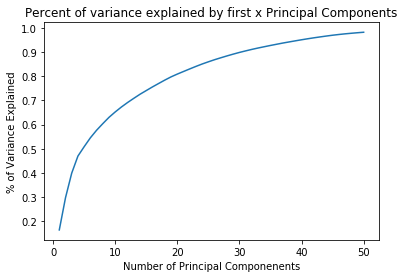

In [4]:
def P1():
### STUDENT START ###
    pca=PCA(n_components=50)
    pca.fit(train_data)
    print("Percentage of variance explained by each of the first 50 principal components individually:",list(zip(list(map(lambda x: 'PC #'+str(x)+':',range(1,51))),pca.explained_variance_ratio_))) 
    plt.plot(list(range(1,51)),[sum(pca.explained_variance_ratio_[:i]) for i in range(1,51)])
    plt.title('Percent of variance explained by first x Principal Components')
    plt.xlabel('Number of Principal Componenents')
    plt.ylabel('% of Variance Explained')
    plt.show()
### STUDENT END ###

P1()

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

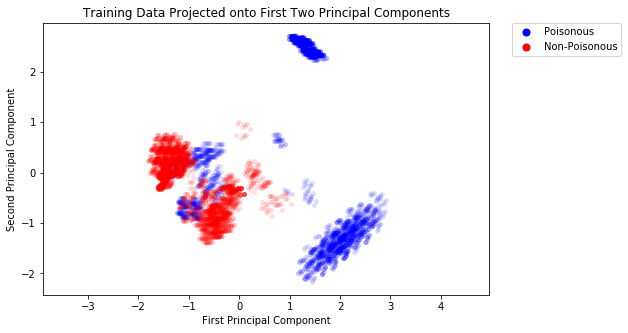

In [5]:
def P2():
### STUDENT START ###
    pca=PCA(n_components=2)
    train_data_new=np.array(pca.fit_transform(train_data))
    plt.figure(figsize=(8,5))
    ax=plt.gca()
    ax.axis('equal')
    ax.scatter([], [], s=50, c='blue',alpha=1,label="Poisonous")
    ax.scatter([], [], s=50, c='red',alpha=1,label="Non-Poisonous")
    ax.scatter(train_data_new[train_labels==1, 0], train_data_new[train_labels==1, 1], s=15, c='blue',alpha=.1)
    ax.scatter(train_data_new[train_labels==0, 0], train_data_new[train_labels==0, 1], s=15, c='red',alpha=.1)
    plt.title('Training Data Projected onto First Two Principal Components')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
### STUDENT END ###

P2()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

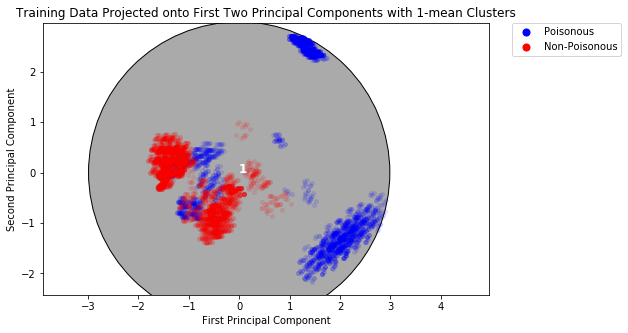

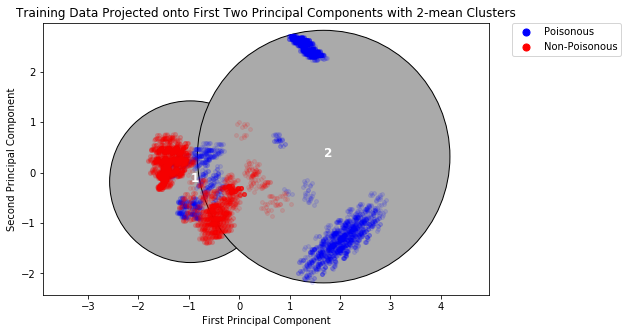

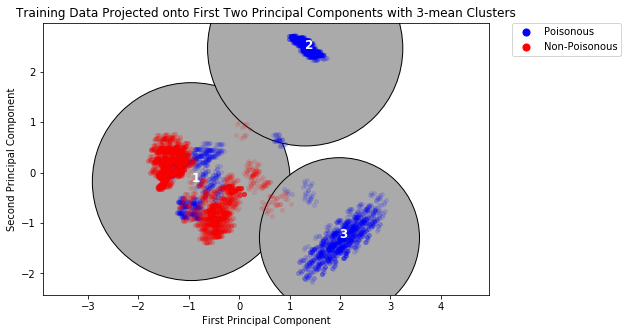

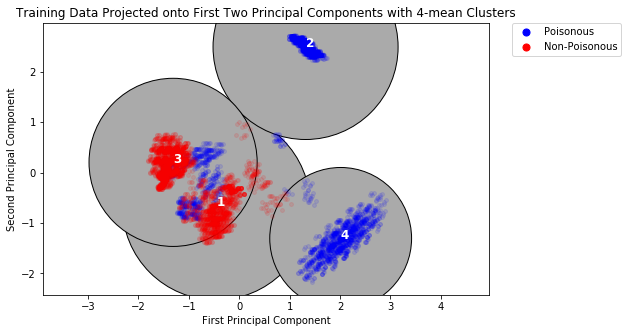

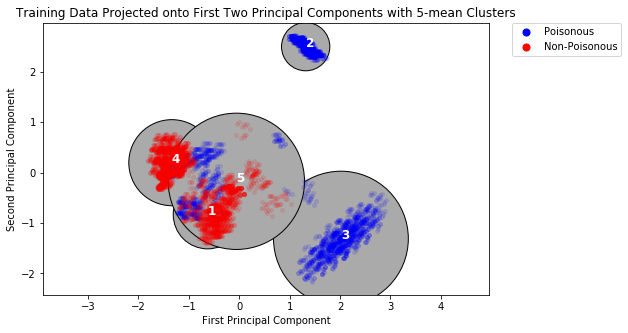

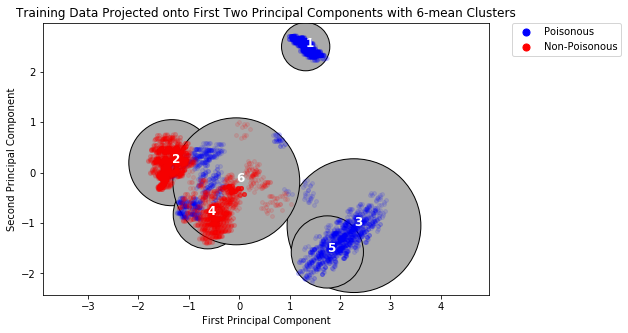

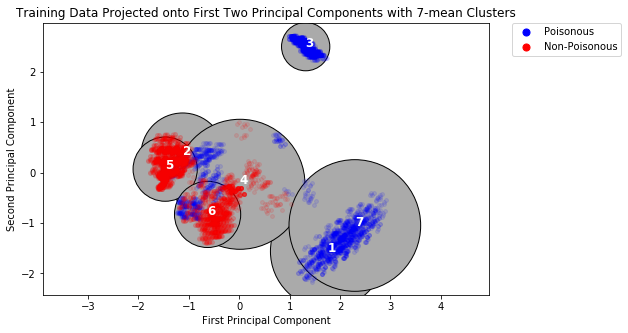

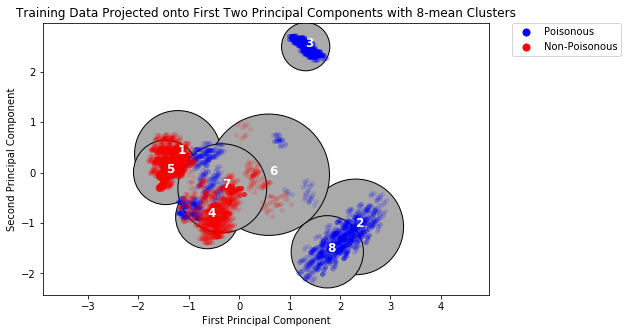

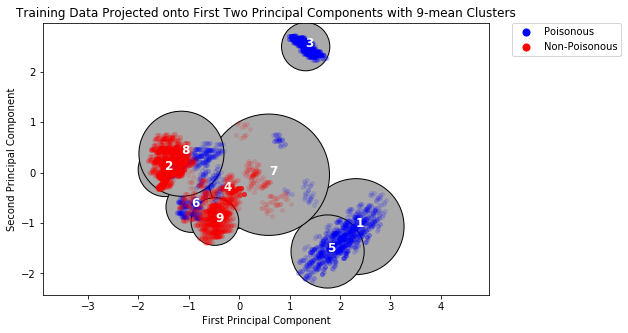

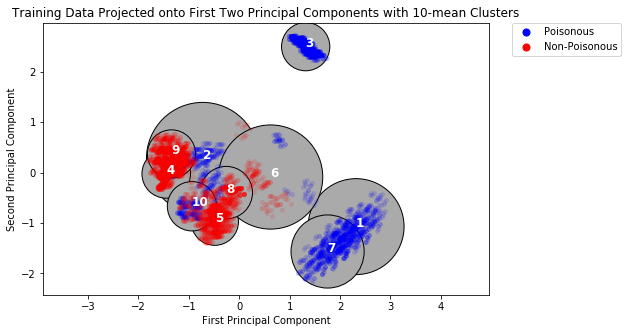

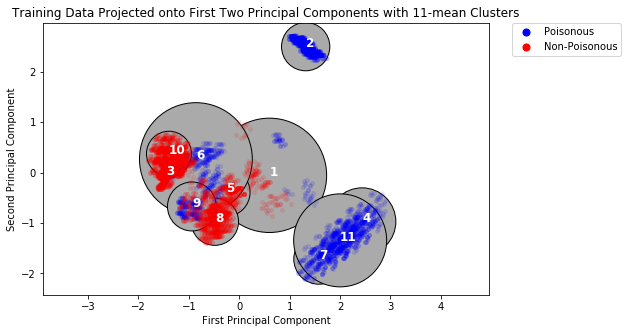

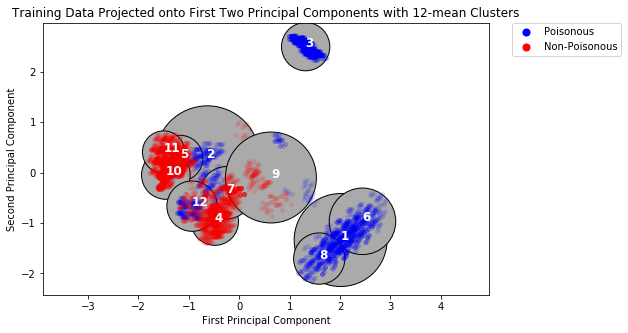

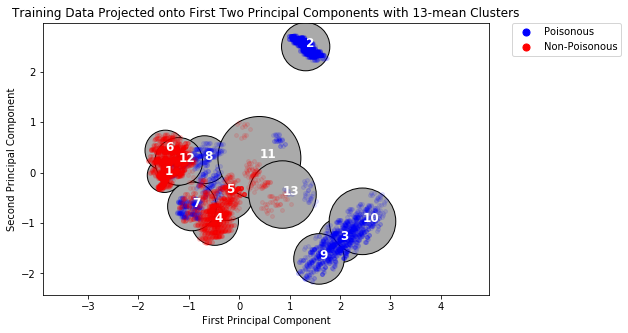

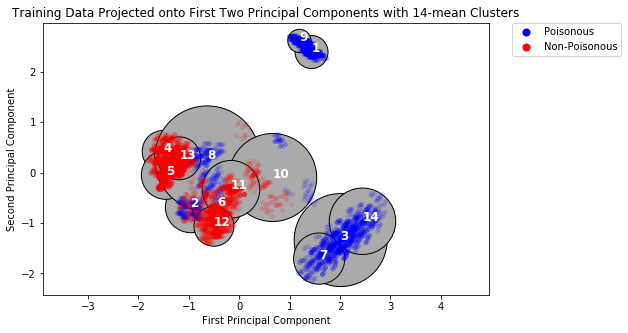

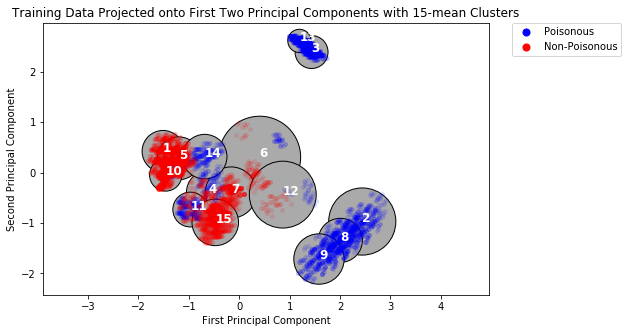

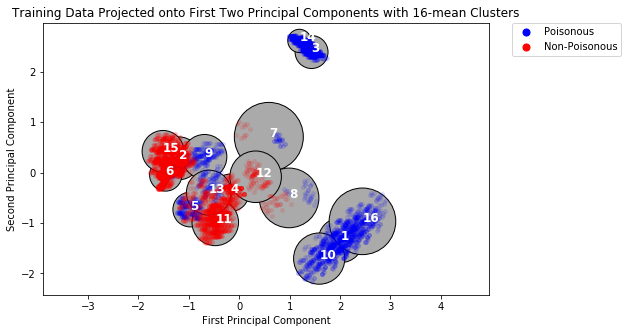

In [6]:
from scipy.spatial.distance import cdist

def P3():
### STUDENT START ###
    pca=PCA(n_components=2)
    train_data_new=np.array(pca.fit_transform(train_data))
    for n_clusters in range(1,17):
        kmeans=KMeans(n_clusters=n_clusters,random_state=0)
        kmeans.fit(train_data_new)
        plt.figure(figsize=(8,5))
        ax=plt.gca()
        ax.axis('equal')
        ax.scatter([], [], s=50, c='blue',alpha=1,label="Poisonous")
        ax.scatter([], [], s=50, c='red',alpha=1,label="Non-Poisonous")
        ax.scatter(train_data_new[train_labels==1, 0], train_data_new[train_labels==1, 1], s=15, c='blue',alpha=.1,zorder=2)
        ax.scatter(train_data_new[train_labels==0, 0], train_data_new[train_labels==0, 1], s=15, c='red',alpha=.1,zorder=2)
        for i in range(n_clusters):
            radii = cdist(train_data_new[kmeans.labels_ == i], [kmeans.cluster_centers_[i]]).max()
            circle=plt.Circle(kmeans.cluster_centers_[i], radii, color='#AAAAAA', ec='black')
            ax.add_patch(circle)
            plt.text(kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1],str(i+1),color='white',size=12,weight='bold')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.title('Training Data Projected onto First Two Principal Components with %d-mean Clusters' % n_clusters)
        plt.xlabel('First Principal Component')
        plt.ylabel('Second Principal Component')
        plt.show()
        
### STUDENT END ###

P3()

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

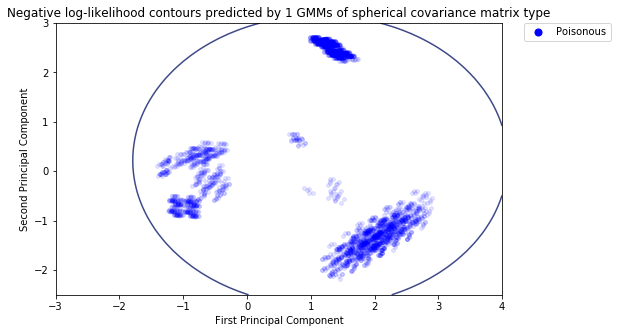

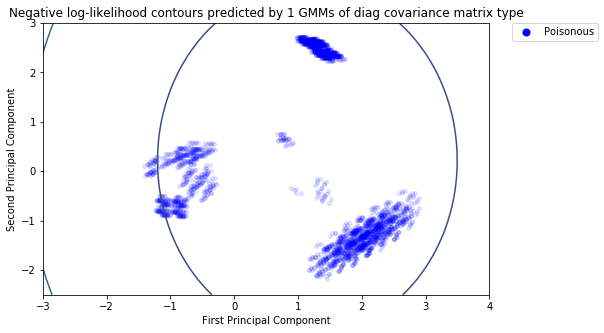

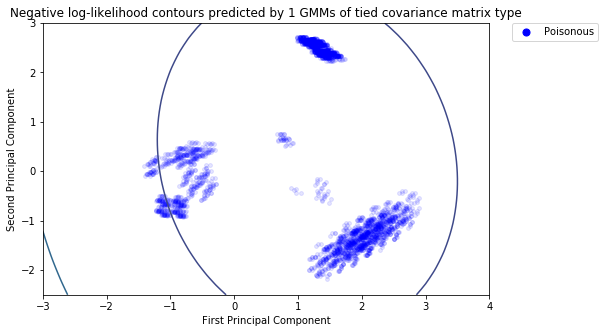

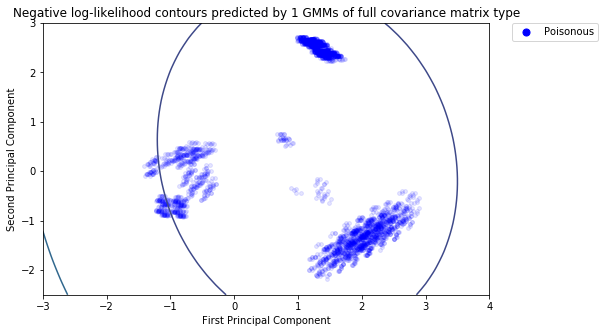

C:\Users\adpra\AppData\Roaming\Python\Python36\site-packages\matplotlib\contour.py:1537: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


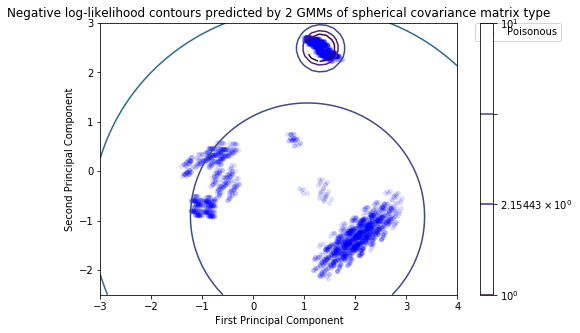

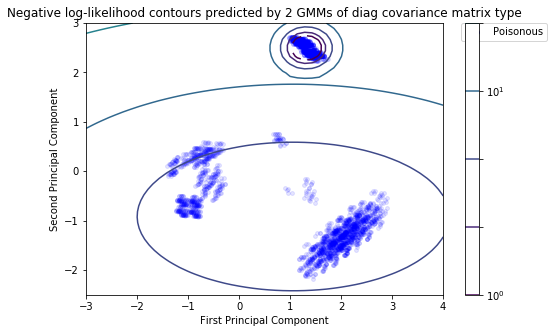

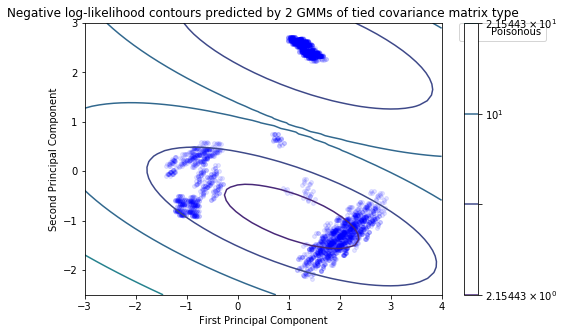

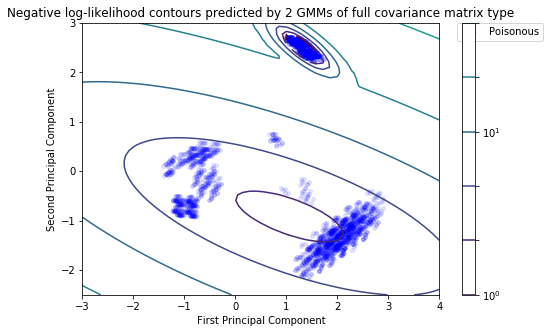

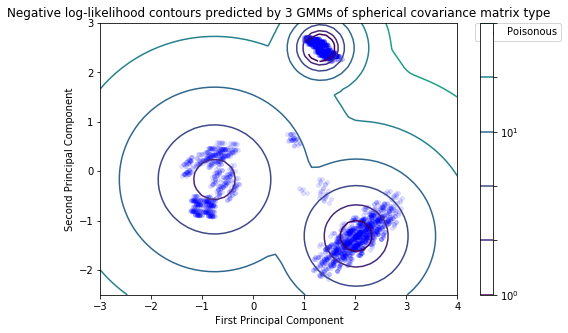

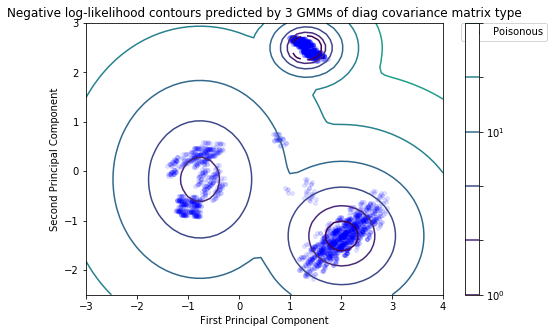

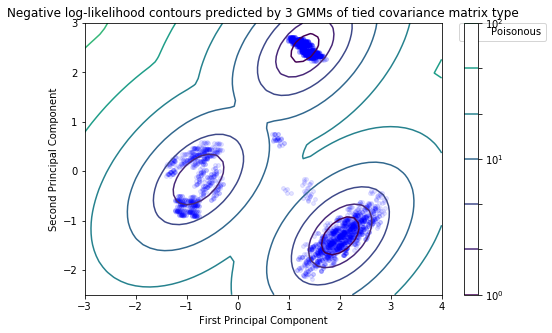

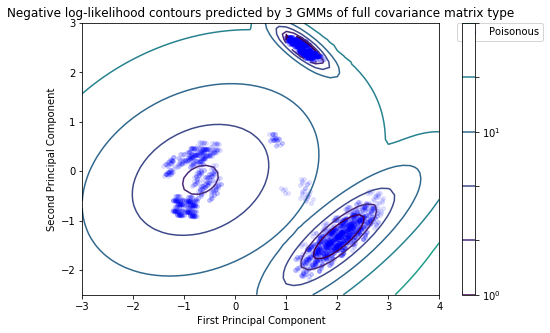

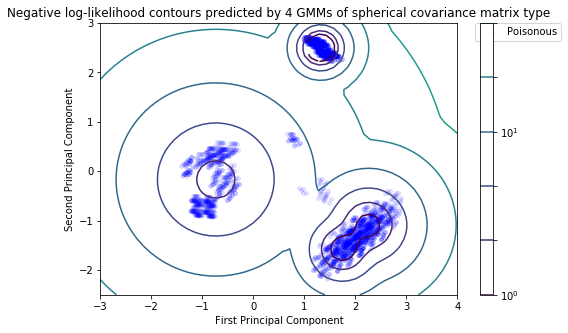

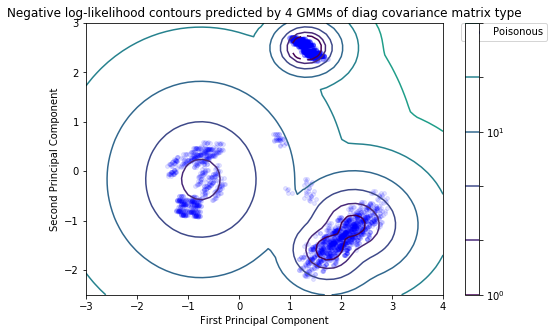

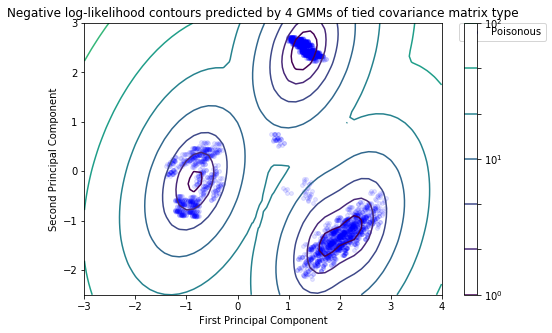

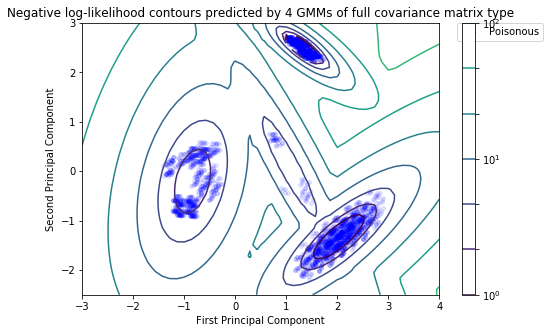

In [7]:
from matplotlib.colors import LogNorm

def P4():
### STUDENT START ###
    pca=PCA(n_components=2)
    train_data_new=np.array(pca.fit_transform(train_data))
    for n_components in range(1,5):
        for covariance_type in ['spherical','diag','tied','full']:
            gmm=GaussianMixture(n_components=n_components,covariance_type=covariance_type)
            gmm.fit(train_data_new[train_labels>0])
            
            plt.figure(figsize=(8,5))
            ax=plt.gca()
            ax.axis('equal')
            ax.scatter([], [], s=50, c='blue',alpha=1,label="Poisonous")
#             ax.scatter([], [], s=50, c='red',alpha=1,label="Non-Poisonous")
            ax.scatter(train_data_new[train_labels==1, 0], train_data_new[train_labels==1, 1], s=15, c='blue', alpha=.1, zorder=2)
#             ax.scatter(train_data_new[train_labels==0, 0], train_data_new[train_labels==0, 1], s=15, c='red', alpha=.1, zorder=2)
            
            x = np.linspace(-3., 4.)
            y = np.linspace(-2.5, 3.)
            X1, Y1 = np.meshgrid(x, y)
            X2 = np.array([X1.ravel(), Y1.ravel()]).T
            Z = -(gmm.score_samples(X2))
            Z = Z.reshape(X1.shape)

            CS = plt.contour(X1, Y1, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                         levels=np.logspace(0, 3, 10))
            if n_components>1:
                CB = plt.colorbar(CS, extend='both')

            plt.title('Negative log-likelihood contours predicted by %d GMMs of %s covariance matrix type' %(n_components, covariance_type))
            plt.xlabel('First Principal Component')
            plt.ylabel('Second Principal Component')
            plt.axis('tight')
            plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            plt.show()
### STUDENT END ###

P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

Average Accuracy = 67.35%
Standard Deviation of Accuracies = 19.62%


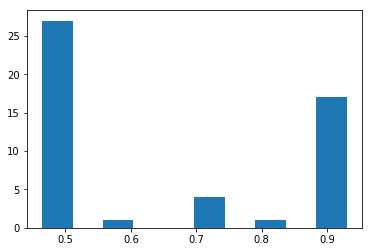

In [10]:
def P5(num_trials=50):
### STUDENT START ###
    accuracies=[]
    for i in range(num_trials):
        pca=PCA(n_components=2)
        train_data_new=np.array(pca.fit_transform(train_data))
        test_data_new=np.array(pca.fit_transform(test_data))    
        n_components=4
        covariance_type='full'
        gmm1=GaussianMixture(n_components=n_components,covariance_type=covariance_type)
        gmm1.fit(train_data_new[train_labels==1])
        gmm2=GaussianMixture(n_components=n_components,covariance_type=covariance_type)
        gmm2.fit(train_data_new[train_labels==0])
        pred_labels=gmm1.score_samples(test_data_new)>gmm2.score_samples(test_data_new)
        accuracy=np.sum(pred_labels==test_labels)/len(test_labels)
#         print('Accuracy of trial #%d = %.2f%%'%(i+1,round(accuracy,4)*100))
        accuracies.append(accuracy)
    plt.hist(accuracies)
    print('Average Accuracy = %.2f%%' % (round(np.mean(accuracies),4)*100))
    print('Standard Deviation of Accuracies = %.2f%%'% (round(np.std(accuracies),4)*100))
    
    
    
### STUDENT END ###

P5()

(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

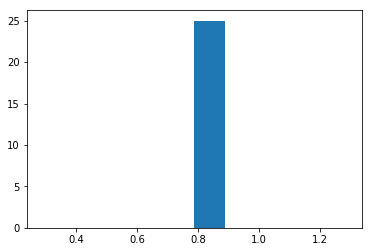

Test #1 produced average accuracy of 78.74% with standard deviation of 0.00%.


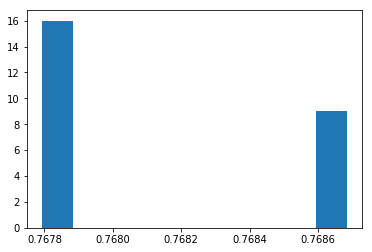

Test #2 produced average accuracy of 76.81% with standard deviation of 0.04%.


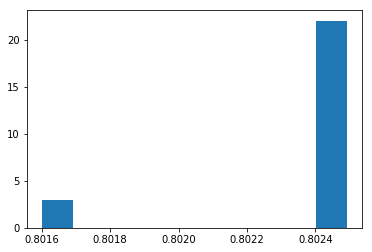

Test #3 produced average accuracy of 80.24% with standard deviation of 0.03%.


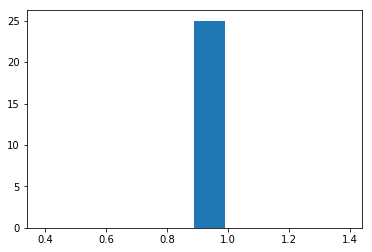

Test #4 produced average accuracy of 88.97% with standard deviation of 0.00%.


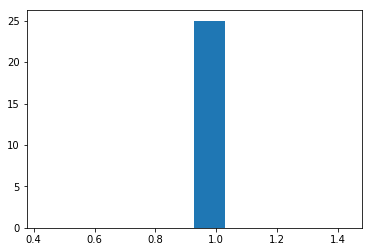

Test #5 produced average accuracy of 92.79% with standard deviation of 0.00%.


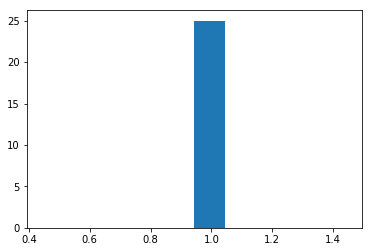

Test #6 produced average accuracy of 94.40% with standard deviation of 0.00%.


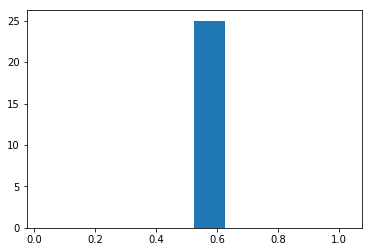

Test #7 produced average accuracy of 52.58% with standard deviation of 0.00%.


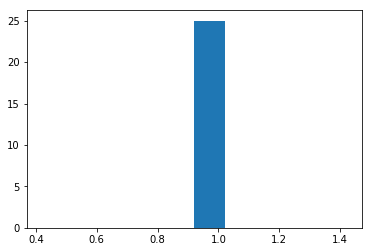

Test #8 produced average accuracy of 92.08% with standard deviation of 0.00%.


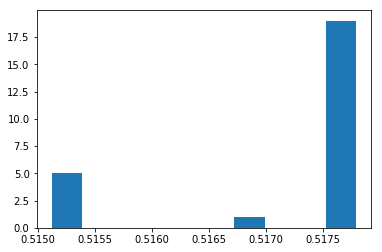

Test #9 produced average accuracy of 51.72% with standard deviation of 0.11%.


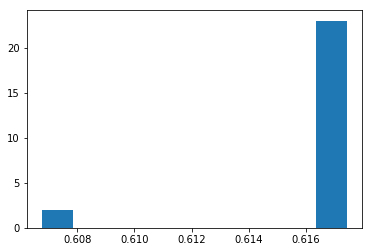

Test #10 produced average accuracy of 61.59% with standard deviation of 0.27%.


In [11]:
def P6(num_trials=25):
### STUDENT START ###
    accuracies=np.zeros([10,num_trials])
    for i in range(num_trials):
        test_num=0
    #Test 1 with 4 PCA components and 2 Gmm components of full covariance type there are: 
    #((4 mean vector + 4x2 cov matrix)x2 components)x2 classes = 48.
        n_pca_components=4
        pca=PCA(n_components=n_pca_components)
        train_data_new=np.array(pca.fit_transform(train_data))
        test_data_new=np.array(pca.fit_transform(test_data))    
        n_components_gmm1=2
        n_components_gmm2=2
        covariance_type='full'
        gmm1=GaussianMixture(n_components=n_components_gmm1,covariance_type=covariance_type,random_state=2)
        gmm1.fit(train_data_new[train_labels==1])
        gmm2=GaussianMixture(n_components=n_components_gmm2,covariance_type=covariance_type,random_state=2)
        gmm2.fit(train_data_new[train_labels==0])
        pred_labels=gmm1.score_samples(test_data_new)>gmm2.score_samples(test_data_new)
        accuracy=np.sum(pred_labels==test_labels)/len(test_labels)
        accuracies[test_num,i]=accuracy
#         print('Test #%d, trial #%d using %d Principal Components, %d gmm components for poisonous cases, %d gmm components for non-poisonous cases of covariance matrix type %s yields Accuracy = %.2f'%(test_num+1,i,n_pca_components,n_components_gmm1,n_components_gmm2,covariance_type,round(accuracy,4)*100))
        test_num+=1

    #Test 2 with 4 PCA components and 3 Gmm components of diag covariance type there are: 
    #((4 mean vector + 4 cov matrix)x3 components)x2 classes = 48.
        n_pca_components=4
        pca=PCA(n_components=n_pca_components)
        train_data_new=np.array(pca.fit_transform(train_data))
        test_data_new=np.array(pca.fit_transform(test_data))    
        n_components_gmm1=3
        n_components_gmm2=3
        covariance_type='diag'
        gmm1=GaussianMixture(n_components=n_components_gmm1,covariance_type=covariance_type,random_state=2)
        gmm1.fit(train_data_new[train_labels==1])
        gmm2=GaussianMixture(n_components=n_components_gmm2,covariance_type=covariance_type,random_state=2)
        gmm2.fit(train_data_new[train_labels==0])
        pred_labels=gmm1.score_samples(test_data_new)>gmm2.score_samples(test_data_new)
        accuracy=np.sum(pred_labels==test_labels)/len(test_labels)
        accuracies[test_num,i]=accuracy
#         print('Testing using %d Principal Components, %d gmm components for poisonous cases, %d gmm components for non-poisonous cases of covariance matrix type %s yields Accuracy = %.2f'%(n_pca_components,n_components_gmm1,n_components_gmm2,covariance_type,round(accuracy,4)*100))
        test_num+=1

    #Test 3 with 3 PCA components and 4 Gmm components of diag covariance type there are: 
    #((3 mean vector + 3 cov matrix)x4 components)x2 classes = 48.
        n_pca_components=3
        pca=PCA(n_components=n_pca_components)
        train_data_new=np.array(pca.fit_transform(train_data))
        test_data_new=np.array(pca.fit_transform(test_data))    
        n_components_gmm1=4
        n_components_gmm2=4
        covariance_type='diag'
        gmm1=GaussianMixture(n_components=n_components_gmm1,covariance_type=covariance_type,random_state=2)
        gmm1.fit(train_data_new[train_labels==1])
        gmm2=GaussianMixture(n_components=n_components_gmm2,covariance_type=covariance_type,random_state=2)
        gmm2.fit(train_data_new[train_labels==0])
        pred_labels=gmm1.score_samples(test_data_new)>gmm2.score_samples(test_data_new)
        accuracy=np.sum(pred_labels==test_labels)/len(test_labels)
        accuracies[test_num,i]=accuracy
#         print('Test #%d, trial #%d using %d Principal Components, %d gmm components for poisonous cases, %d gmm components for non-poisonous cases of covariance matrix type %s yields Accuracy = %.2f'%(test_num+1,i+1,n_pca_components,n_components_gmm1,n_components_gmm2,covariance_type,round(accuracy,4)*100))
        test_num+=1

    #Test 4 with 2 PCA components and 3 Gmm components of full covariance type there are: 
    #((2 mean vector + 2x3 cov matrix)x3 components)x2 classes = 48.
        n_pca_components=2
        pca=PCA(n_components=n_pca_components)
        train_data_new=np.array(pca.fit_transform(train_data))
        test_data_new=np.array(pca.fit_transform(test_data))    
        n_components_gmm1=3
        n_components_gmm2=3
        covariance_type='full'
        gmm1=GaussianMixture(n_components=n_components_gmm1,covariance_type=covariance_type,random_state=2)
        gmm1.fit(train_data_new[train_labels==1])
        gmm2=GaussianMixture(n_components=n_components_gmm2,covariance_type=covariance_type,random_state=2)
        gmm2.fit(train_data_new[train_labels==0])
        pred_labels=gmm1.score_samples(test_data_new)>gmm2.score_samples(test_data_new)
        accuracy=np.sum(pred_labels==test_labels)/len(test_labels)
        accuracies[test_num,i]=accuracy
#         print('Test #%d, trial #%d using %d Principal Components, %d gmm components for poisonous cases, %d gmm components for non-poisonous cases of covariance matrix type %s yields Accuracy = %.2f'%(test_num+1,i+1,n_pca_components,n_components_gmm1,n_components_gmm2,covariance_type,round(accuracy,4)*100))
        test_num+=1

    #Test 5 with 2 PCA components and 6 Gmm components of diag covariance type there are: 
    #((2 mean vector + 2 cov matrix)x6 components)x2 classes = 48.
        n_pca_components=2
        pca=PCA(n_components=n_pca_components)
        train_data_new=np.array(pca.fit_transform(train_data))
        test_data_new=np.array(pca.fit_transform(test_data))    
        n_components_gmm1=6
        n_components_gmm2=6
        covariance_type='diag'
        gmm1=GaussianMixture(n_components=n_components_gmm1,covariance_type=covariance_type,random_state=2)
        gmm1.fit(train_data_new[train_labels==1])
        gmm2=GaussianMixture(n_components=n_components_gmm2,covariance_type=covariance_type,random_state=2)
        gmm2.fit(train_data_new[train_labels==0])
        pred_labels=gmm1.score_samples(test_data_new)>gmm2.score_samples(test_data_new)
        accuracy=np.sum(pred_labels==test_labels)/len(test_labels)
        accuracies[test_num,i]=accuracy
#         print('Test #%d, trial #%d using %d Principal Components, %d gmm components for poisonous cases, %d gmm components for non-poisonous cases of covariance matrix type %s yields Accuracy = %.2f'%(test_num+1,i+1,n_pca_components,n_components_gmm1,n_components_gmm2,covariance_type,round(accuracy,4)*100))
        test_num+=1
        
    #Test 6 with 3 PCA components and 8 Gmm components of spherical covariance type (no cov) there are: 
    #((3 mean vector)x8 components)x2 classes= 48.
        n_pca_components=3
        pca=PCA(n_components=n_pca_components)
        train_data_new=np.array(pca.fit_transform(train_data))
        test_data_new=np.array(pca.fit_transform(test_data))    
        n_components_gmm1=8
        n_components_gmm2=8
        covariance_type='spherical'
        gmm1=GaussianMixture(n_components=n_components_gmm1,covariance_type=covariance_type,random_state=2)
        gmm1.fit(train_data_new[train_labels==1])
        gmm2=GaussianMixture(n_components=n_components_gmm2,covariance_type=covariance_type,random_state=2)
        gmm2.fit(train_data_new[train_labels==0])
        pred_labels=gmm1.score_samples(test_data_new)>gmm2.score_samples(test_data_new)
        accuracy=np.sum(pred_labels==test_labels)/len(test_labels)
        accuracies[test_num,i]=accuracy
#         print('Test #%d, trial #%d using %d Principal Components, %d gmm components for poisonous cases, %d gmm components for non-poisonous cases of covariance matrix type %s yields Accuracy = %.2f'%(test_num+1,i+1,n_pca_components,n_components_gmm1,n_components_gmm2,covariance_type,round(accuracy,4)*100))
        test_num+=1  
        
    #Test 7 with 2 PCA components and 12 Gmm components of spherical covariance type (no cov) there are: 
    #((2 mean vector)x12 components)x2 classes= 48.
        n_pca_components=2
        pca=PCA(n_components=n_pca_components)
        train_data_new=np.array(pca.fit_transform(train_data))
        test_data_new=np.array(pca.fit_transform(test_data))    
        n_components_gmm1=12
        n_components_gmm2=12
        covariance_type='spherical'
        gmm1=GaussianMixture(n_components=n_components_gmm1,covariance_type=covariance_type,random_state=2)
        gmm1.fit(train_data_new[train_labels==1])
        gmm2=GaussianMixture(n_components=n_components_gmm2,covariance_type=covariance_type,random_state=2)
        gmm2.fit(train_data_new[train_labels==0])
        pred_labels=gmm1.score_samples(test_data_new)>gmm2.score_samples(test_data_new)
        accuracy=np.sum(pred_labels==test_labels)/len(test_labels)
        accuracies[test_num,i]=accuracy
#         print('Test #%d, trial #%d using %d Principal Components, %d gmm components for poisonous cases, %d gmm components for non-poisonous cases of covariance matrix type %s yields Accuracy = %.2f'%(test_num+1,i+1,n_pca_components,n_components_gmm1,n_components_gmm2,covariance_type,round(accuracy,4)*100))
        test_num+=1
                
    #Test 8 with 4 PCA components and 6 Gmm components of spherical covariance type (no cov) there are: 
    #((4 mean vector)x6 components)x2 classes= 48.
        n_pca_components=4
        pca=PCA(n_components=n_pca_components)
        train_data_new=np.array(pca.fit_transform(train_data))
        test_data_new=np.array(pca.fit_transform(test_data))    
        n_components_gmm1=6
        n_components_gmm2=6
        covariance_type='spherical'
        gmm1=GaussianMixture(n_components=n_components_gmm1,covariance_type=covariance_type,random_state=2)
        gmm1.fit(train_data_new[train_labels==1])
        gmm2=GaussianMixture(n_components=n_components_gmm2,covariance_type=covariance_type,random_state=2)
        gmm2.fit(train_data_new[train_labels==0])
        pred_labels=gmm1.score_samples(test_data_new)>gmm2.score_samples(test_data_new)
        accuracy=np.sum(pred_labels==test_labels)/len(test_labels)
        accuracies[test_num,i]=accuracy
#         print('Test #%d, trial #%d using %d Principal Components, %d gmm components for poisonous cases, %d gmm components for non-poisonous cases of covariance matrix type %s yields Accuracy = %.2f'%(test_num+1,i+1,n_pca_components,n_components_gmm1,n_components_gmm2,covariance_type,round(accuracy,4)*100))
        test_num+=1
                        
    #Test 9 with 5 PCA components and 5 Gmm components of spherical covariance type (no cov) there are: 
    #((5 mean vector)x5 components)x2 classes= 50.
        n_pca_components=5
        pca=PCA(n_components=n_pca_components)
        train_data_new=np.array(pca.fit_transform(train_data))
        test_data_new=np.array(pca.fit_transform(test_data))    
        n_components_gmm1=5
        n_components_gmm2=5
        covariance_type='spherical'
        gmm1=GaussianMixture(n_components=n_components_gmm1,covariance_type=covariance_type,random_state=2)
        gmm1.fit(train_data_new[train_labels==1])
        gmm2=GaussianMixture(n_components=n_components_gmm2,covariance_type=covariance_type,random_state=2)
        gmm2.fit(train_data_new[train_labels==0])
        pred_labels=gmm1.score_samples(test_data_new)>gmm2.score_samples(test_data_new)
        accuracy=np.sum(pred_labels==test_labels)/len(test_labels)
        accuracies[test_num,i]=accuracy
#         print('Test #%d, trial #%d using %d Principal Components, %d gmm components for poisonous cases, %d gmm components for non-poisonous cases of covariance matrix type %s yields Accuracy = %.2f'%(test_num+1,i+1,n_pca_components,n_components_gmm1,n_components_gmm2,covariance_type,round(accuracy,4)*100))
        test_num+=1
        
    #Test 10 with 6 PCA components and 4 Gmm components of spherical covariance type (no cov) there are: 
    #((6 mean vector)x4 components)x2 classes= 50.
        n_pca_components=6
        pca=PCA(n_components=n_pca_components)
        train_data_new=np.array(pca.fit_transform(train_data))
        test_data_new=np.array(pca.fit_transform(test_data))    
        n_components_gmm1=4
        n_components_gmm2=4
        covariance_type='spherical'
        gmm1=GaussianMixture(n_components=n_components_gmm1,covariance_type=covariance_type,random_state=2)
        gmm1.fit(train_data_new[train_labels==1])
        gmm2=GaussianMixture(n_components=n_components_gmm2,covariance_type=covariance_type,random_state=2)
        gmm2.fit(train_data_new[train_labels==0])
        pred_labels=gmm1.score_samples(test_data_new)>gmm2.score_samples(test_data_new)
        accuracy=np.sum(pred_labels==test_labels)/len(test_labels)
        accuracies[test_num,i]=accuracy
#         print('Test #%d, trial #%d using %d Principal Components, %d gmm components for poisonous cases, %d gmm components for non-poisonous cases of covariance matrix type %s yields Accuracy = %.2f'%(test_num+1,i+1,n_pca_components,n_components_gmm1,n_components_gmm2,covariance_type,round(accuracy,4)*100))
        test_num+=1
        
    avg_accuracies=np.mean(accuracies,axis=1)
    std_accuracies=np.std(accuracies,axis=1)
    for i in range(test_num):
        plt.hist(accuracies[i,:])
        plt.show()
        ### STUDENT END ###

P6()

### Answer: The most successful tests were using Tests #5 and #6, where Test #5 projected onto 2 Principal Components and used 6 Gaussian Mixture components with diagonal covariance matrices for each class totaling ((2 mean vector + 2 cov mat) X 6 Gaussian Components) X 2 Classes = 48 parameters which yielded 92.79% average accuracy and Test #6 projected onto 3 Principal Components and used 8 Gaussian Mixture components with spherical covariance matrices (i.e. k-means clusters) for each class totaling 3 mean vector X 8 Gaussian/k-Means Components X 2 Classes = 48 parameters which yielded 94.4% accuracy.